In [35]:
from gradcam import GradCAM
import torchvision.models as models
import os
import PIL
import numpy as np
import torch
from utils import normalize
from utils import visualize_cam
import torchvision.transforms as transforms
from torchvision.utils import make_grid, save_image

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

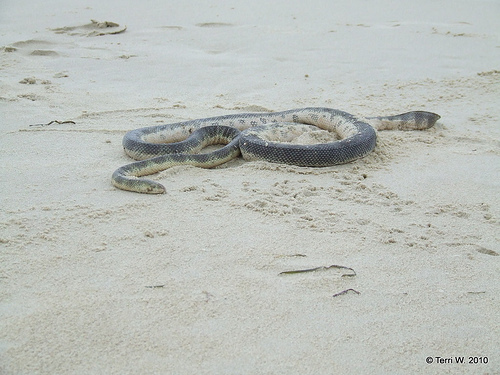

In [36]:
# load and show img
img_dir = 'images'
img_name = 'snake.JPEG'
img_path = os.path.join(img_dir, img_name)

pil_img = PIL.Image.open(img_path)
pil_img

In [37]:
# preprocessing of img
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
img_tensor = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).to(device)
transform = transforms.Compose([transforms.Resize((224, 224))])
img_tensor = transform(img_tensor)

normed_img_tensor = normalize(img_tensor, MEAN, STD)

In [38]:
# load model
model = models.resnet50(pretrained=True).to(device).eval()

In [39]:
# attach gradcam
gradcam = GradCAM('resnet50', model)

successfully extracted the layers


In [40]:
# get mask
mask, _ = gradcam(normed_img_tensor)

# make masked imge
heatmap, result = visualize_cam(mask, img_tensor)

# save dir
os.makedirs('outputs', exist_ok=True)
output_path = os.path.join('outputs', img_name)

# stack and save
img = torch.stack([img_tensor.squeeze().cpu(), heatmap, result], 0)
save_image(img, output_path)

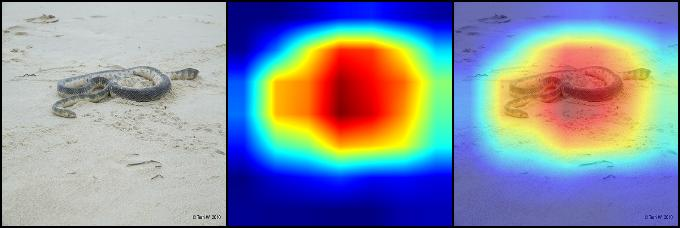

In [41]:
# load and show
PIL.Image.open(output_path)